# 4. Evaluation Project  -  (Census Income Project)

# <span style="color:red">By :- Punit Vishal Singh</span>

# <span style="color:blue">-----------------------------------------------------------------------------------------------------------------</span>

__--> Description:__


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 



# <span style="color:blue">-----------------------------> Description of fnlwgt (final weight) <------------------------------</span>



The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# <span style="color:red">----------------------------------------------> Objective <---------------------------------------------</span>

* __The prediction task is to determine whether a person makes over $50K a year.__

# <span style="color:red">-----------------------------------------------> Steps <--------------------------------------------------</span>

1. Exploratory data analysis

2. Data modeling

3. Outlier detection and skewness treatment

4. Encoding the data — Label Encoder

5. Scaling the data — Standard scaler

6. Fitting the machine learning models

7. Cross-validation of the selected model

8. Model hypertuning

9. AUC-ROC curve

10. Saving the final model and prediction using saved model

### <span style="color:green">Import Packages</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <span style="color:green">Loading The Dataset...............</span>

In [2]:
df=pd.read_csv("Census Income Project.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### <span style="color:green">To check the number of columns of object datatype</span>

In [6]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 9


In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.shape

(32560, 15)

# <span style="color:red">Exploratory Data Analysis (EDA)</span>

### <span style="color:green">Checking Column Names</span>

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### <span style="color:green">Describing The Data</span>

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### <span style="color:blue">Observation:-</span>

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.

__Further, we have a look at our dataset and explore the data in various columns, one by one.__ 

### <span style="color:green">Checking Null/Missing Values</span>

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### <span style="color:green">-> To find correlation of entire dataset with the help of heatmap </span>


<AxesSubplot:>

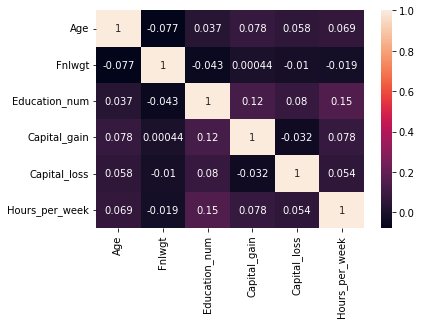

In [13]:
sns.heatmap(df.corr(),annot=True)

#### <span style="color:blue">Observation:-</span>

- Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. The correlations are moderate.

### <span style="color:green">Checking the unique values present in the columns</span>

#### <span style="color:blue">Checking the unique values present in the Workclass columns</span>

In [14]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
print(df['Workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


#### <span style="color:blue">Checking the unique values present in the Native_country columns</span>

In [16]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
print(df['Native_country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#### <span style="color:blue">Checking the unique values present in the Occupation columns</span>

In [18]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
print(df['Occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


#### <span style="color:blue">Observation:-</span>

__As we can notice in ‘Workclass’, ‘Native_country’ & ‘Occupation’ columns there is ‘?’ which will be consider as a null values. Hence we have to replace with authentic values.__

- __"Workclass" consists 1836, “Native_country” contains 583 missing values and “Occupation” contains 1843 missing values as count is huge.__ 


- As we can notice in both the columns large number of number are missing in the form of (?). 

### <span style="color:blue">How To Treat The Null Values in general situation?</span>

- We can fill all the NaN Values with the Mean, Median of each column. 
- We can drop all the Nan values from the dataset by using #df=df.dropna() or we can replace it with mean or median 
 

In present situation we can see that


- we replace ‘?’ is ‘Workclass’ column by ‘Private’, ‘Occupation’ column by ‘Prof-speciality’ and ‘Native_country’ by ‘United_States’.

#### <span style="color:blue">To Replace Number of Missing Values (?) Present in 'Workclass' Column</span>

In [20]:
df['Workclass'] = df['Workclass'].replace(' ?', ' Private')

#### <span style="color:blue">To Replace Number of Missing Values (?) Present in 'Occupation' Column</span>

In [21]:
df['Occupation'] = df['Occupation'].replace(' ?', ' Prof-specialty')

#### <span style="color:blue">To Replace Number of Missing Values (?) Present in ‘Native_country’ Column</span>

In [22]:
df['Native_country'] = df['Native_country'].replace(' ?', ' United-States')

### <span style="color:green">Checking Replacment in ‘Workclass’, ‘Native_country’ & ‘Occupation’ columns</span>

In [23]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [24]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

#### <span style="color:blue">Observation:-</span>

- ___We successfully replaced all the missing values which were present in the form of (?) in ‘Workclass’, ‘Native_country’ & ‘Occupation’ columns.___ 

In [26]:
df.shape

(32560, 15)

#### <span style="color:blue">Observation:-</span>

- ___We successfully replaced the missing values which were present in the form of (?) in the columns.___ 

### <span style="color:green">** To Print All Of The Object Data Type & Their Unique Values All Together</span>

In [27]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("-----------------------------------------------------------------------------------------------------------")

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------------------------------------------------------------------------------
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th      

# <span style="color:red">Data Visualisation </span>

### <span style="color:green">-> Using heatmap to check the missing value & Saving Dataset as df</span>

<AxesSubplot:>

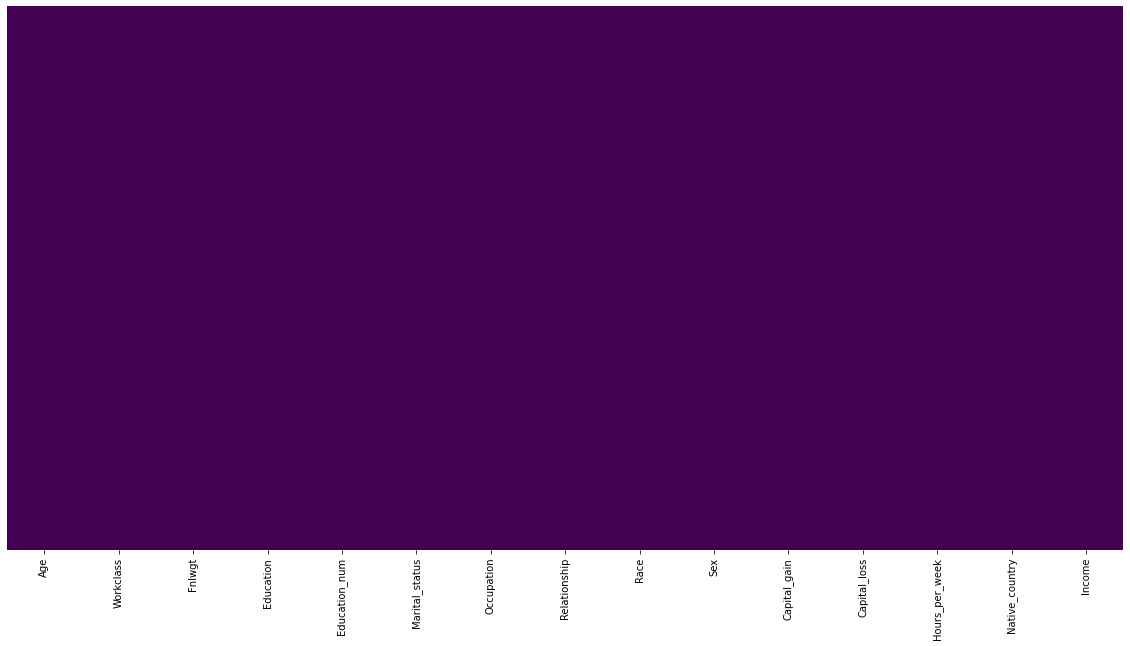

In [28]:

plt.figure(figsize =(20, 10))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

### <span style="color:green">-> To check skewness of entire dataset all together </span>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

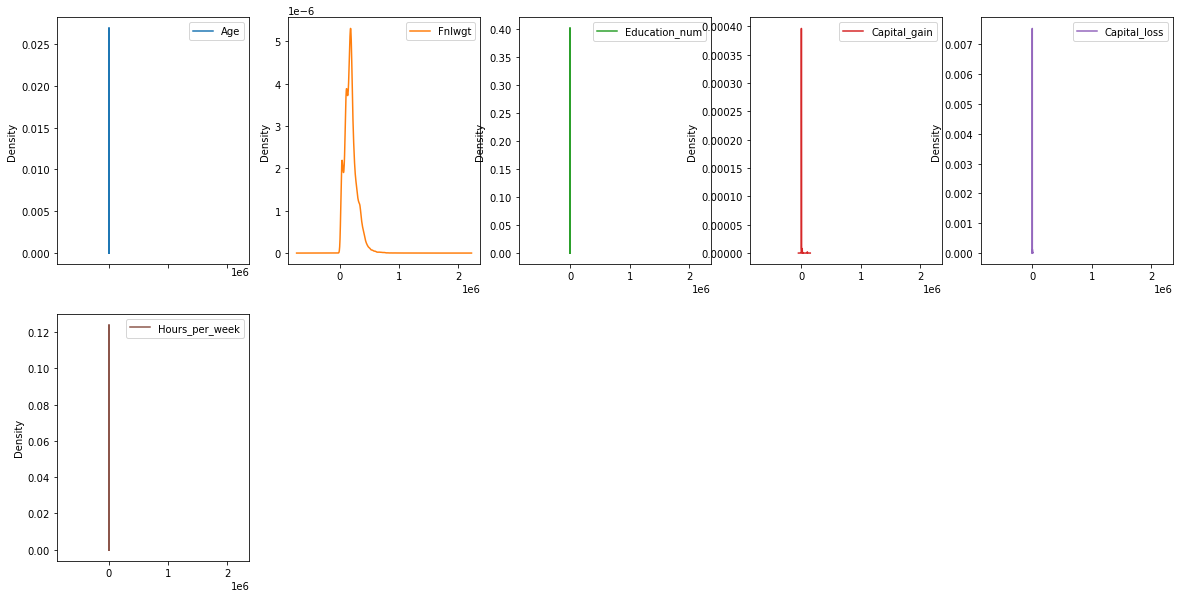

In [29]:
df.plot(kind='kde',subplots=True,layout=(2,5), figsize=(20,10))

### <span style="color:green">-> To Show The Distribution Of All Variables</span>

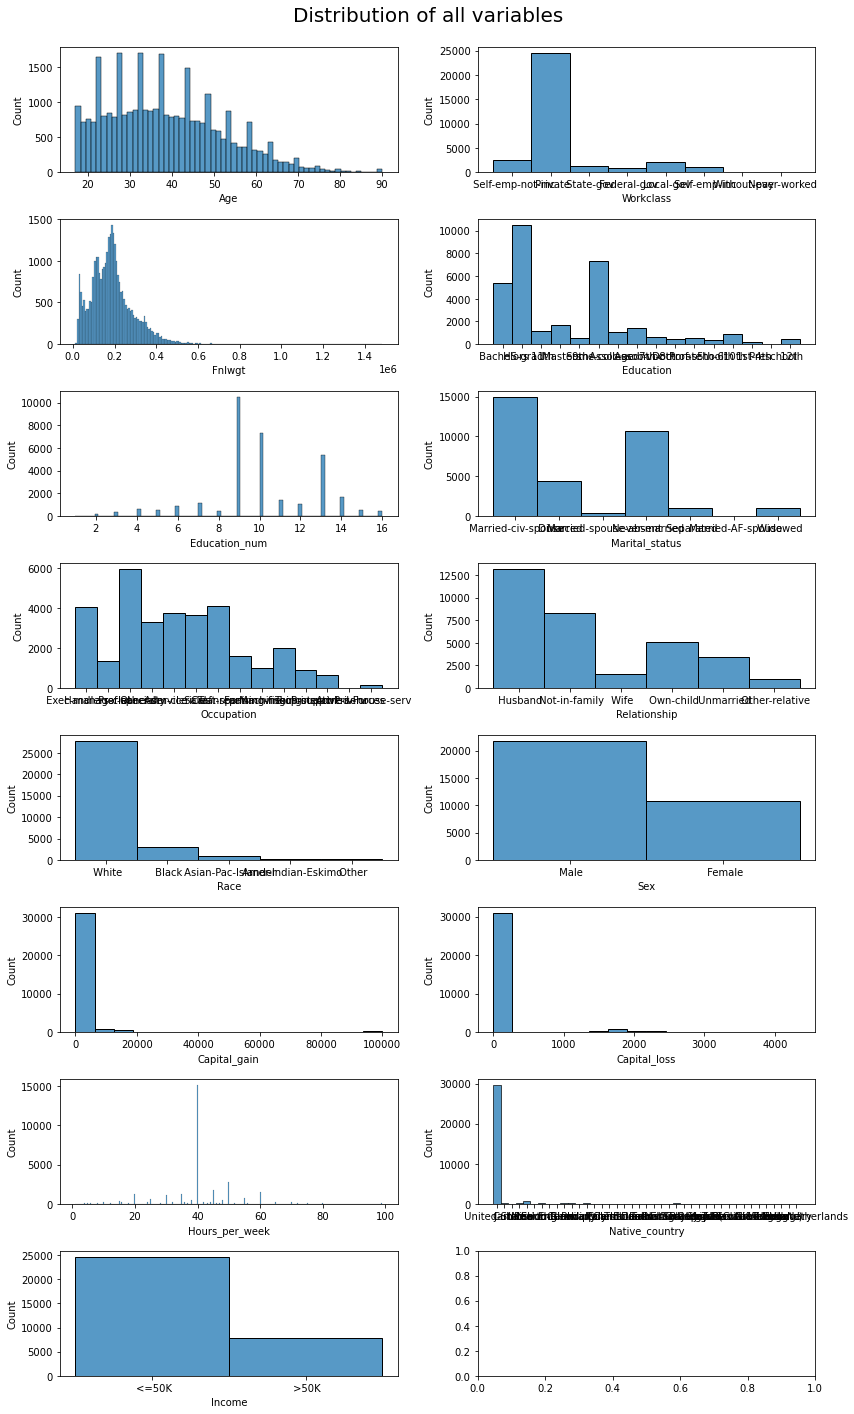

In [30]:
ncols = 2
nrows = np.ceil(len(df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df.columns, axs.flatten()):
    sns.histplot(df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

### <span style="color:green">-> Using Subplot To Show Column-Wise Relationship With Attrition</span>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

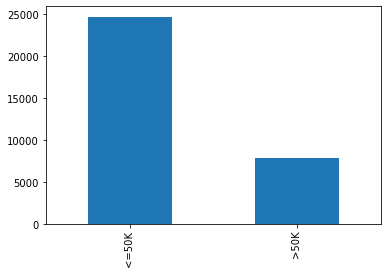

In [32]:
df['Income'].value_counts().plot(kind='bar')

### <span style="color:blue">-> Using Subplot To Show Age-wise Income</span>

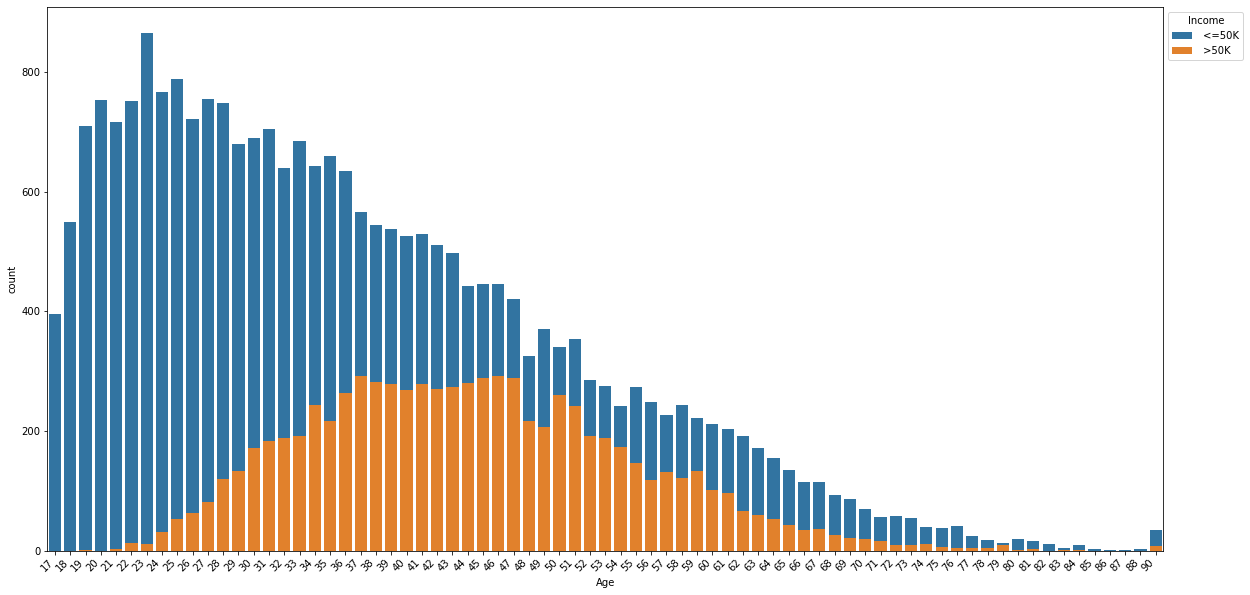

In [33]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Age', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__Income is high between 36 to 47.__

### <span style="color:blue">-> Using Subplot To Show Workclass-wise Income</span>

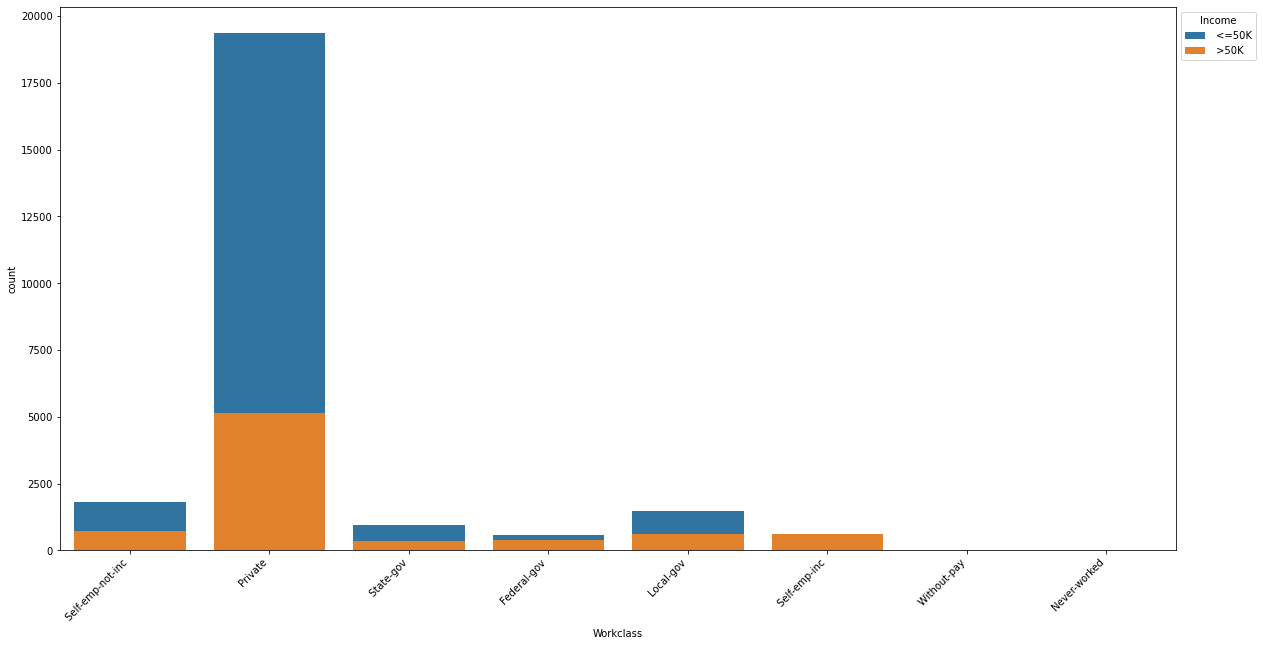

In [34]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Workclass', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
Here:-

- __More peopele are there in the private sectors__

### <span style="color:blue">-> Using Subplot To Show Fnlwgt-wise Income</span>

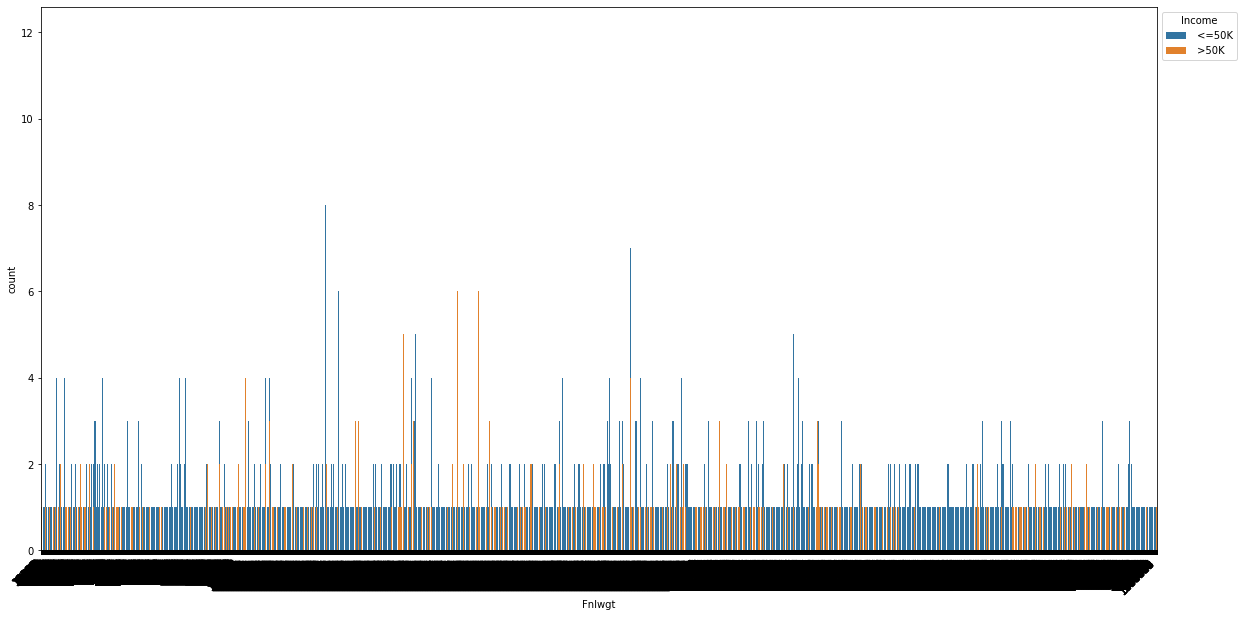

In [35]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Fnlwgt', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

### <span style="color:blue">-> Using Subplot To Show Education-wise Income</span>

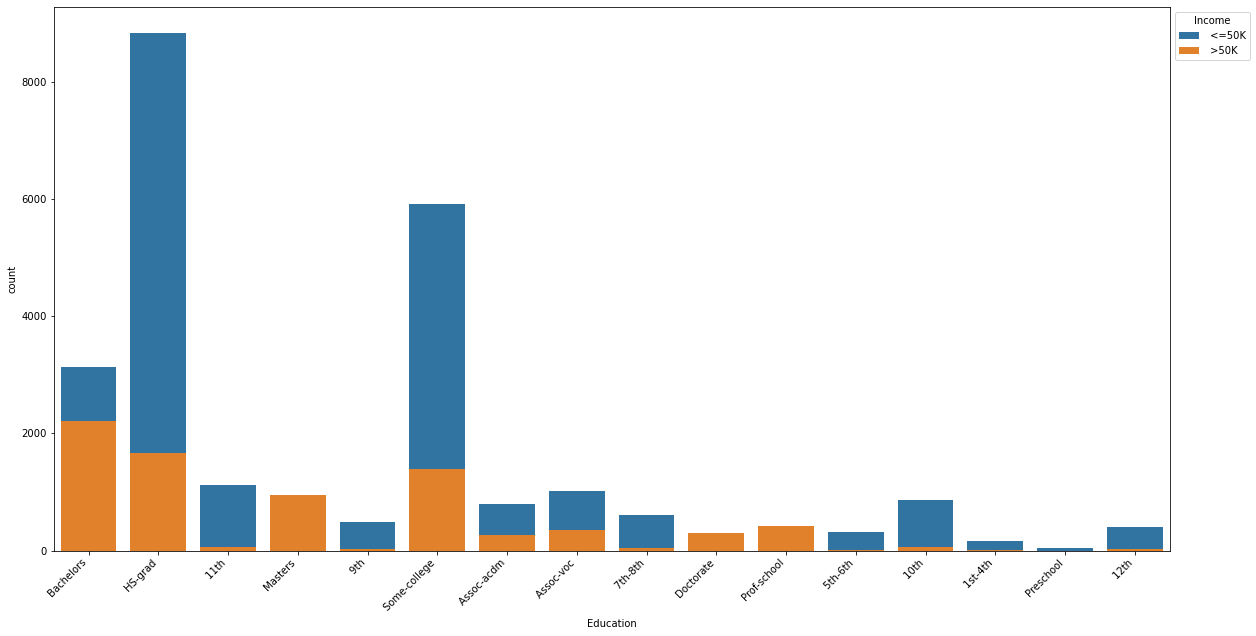

In [36]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Education', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__Bachelors are earning more__

### <span style="color:blue">-> Using Subplot To Show Education_num-wise Income</span>

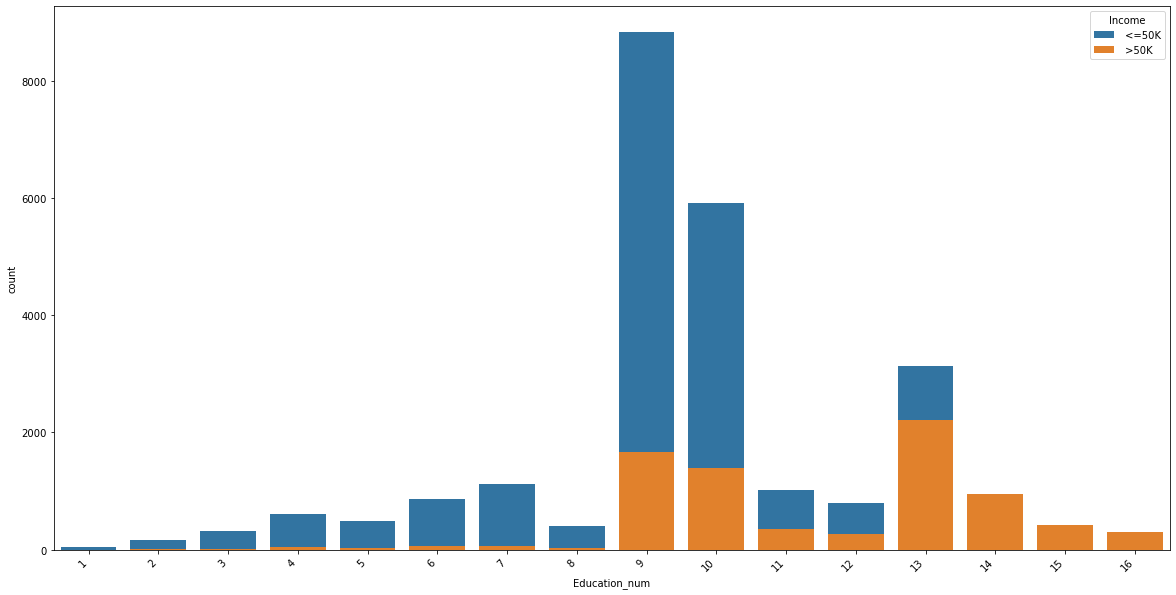

In [37]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Education_num', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

- __Income is high at 13__

### <span style="color:blue">-> Using Subplot To Show Marital_status-wise Attrition</span>

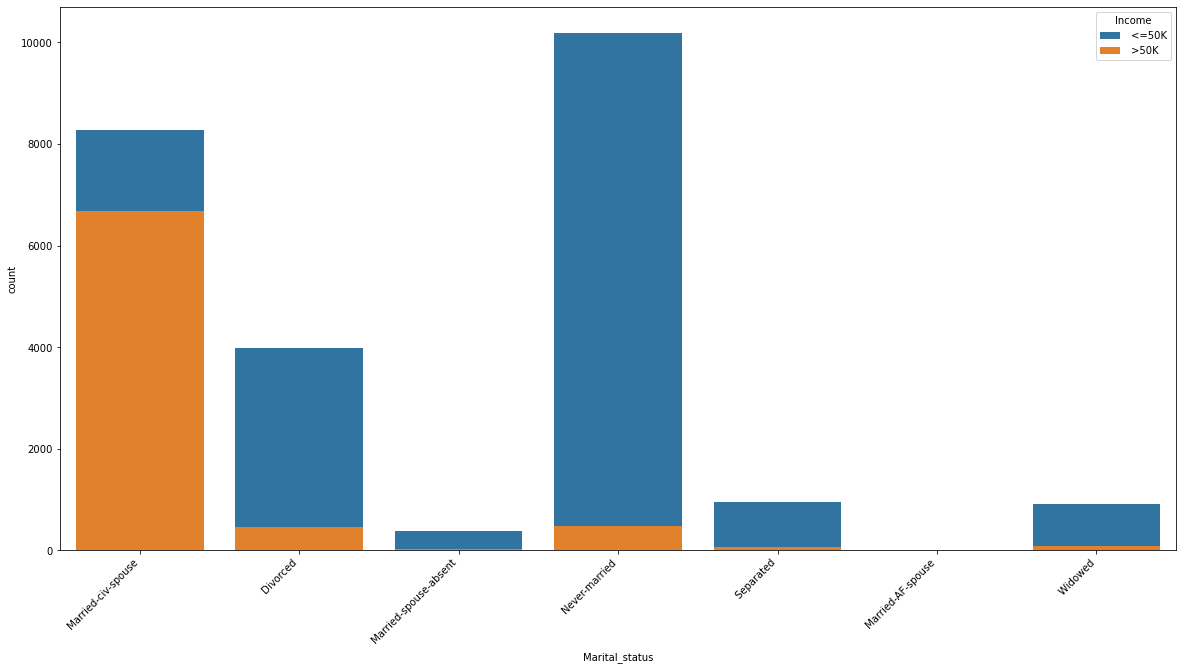

In [38]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Marital_status', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
- __Income is high in Married-civ-spouse__

### <span style="color:blue">-> Using Subplot To Show Occupation-wise Income</span>

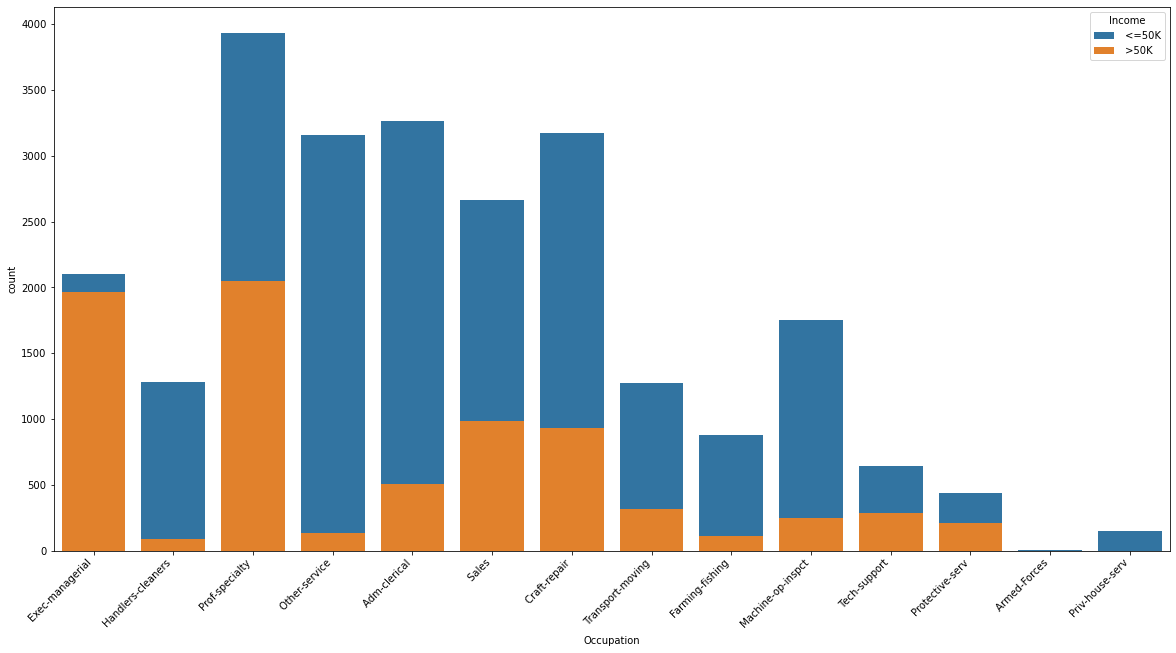

In [39]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Occupation', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

Here:
- __Income is high in Exec-managerial__

### <span style="color:blue">-> Using Subplot To Show Relationship-wise Income</span>

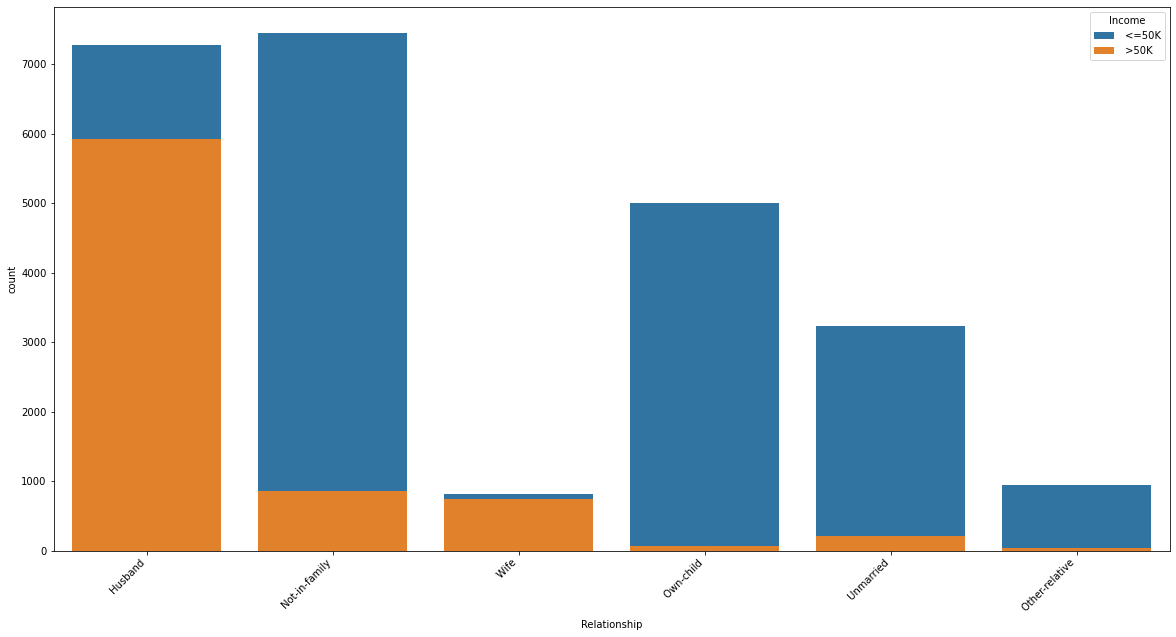

In [40]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Relationship', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

Here:

- __Income of Husband is high.__

### <span style="color:blue">-> Using Subplot To Show Race-wise Income</span>

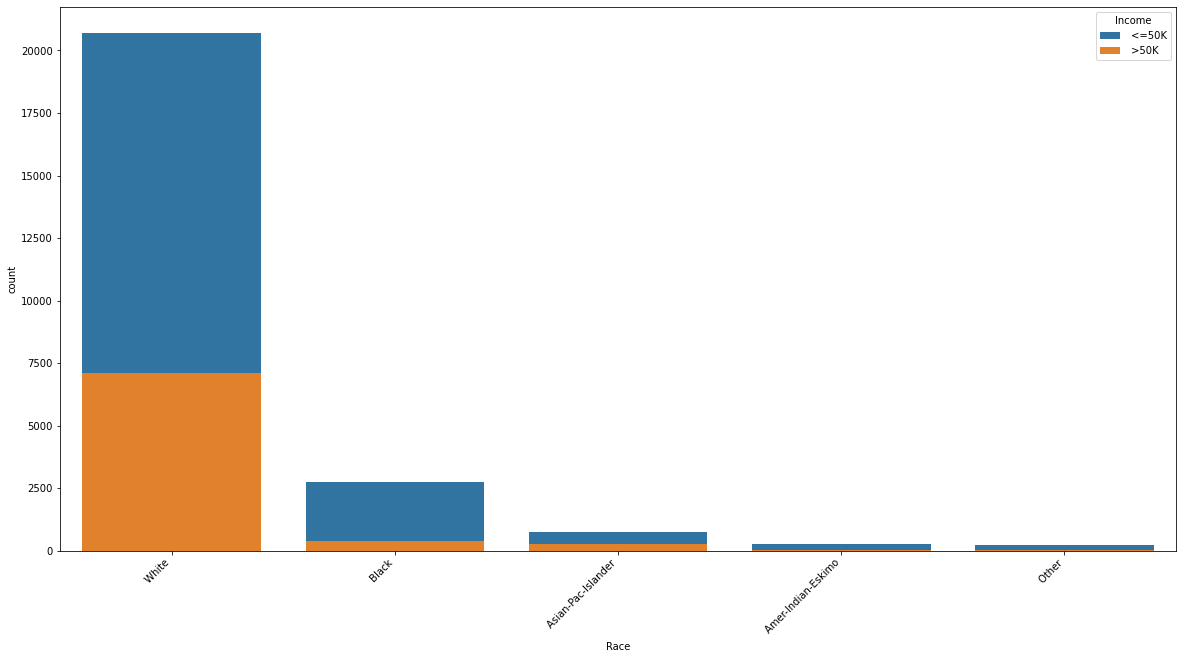

In [41]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Race', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

Here:

- __Income of White people is high.__

### <span style="color:blue">-> Using Subplot To Show Sex-wise Income</span>

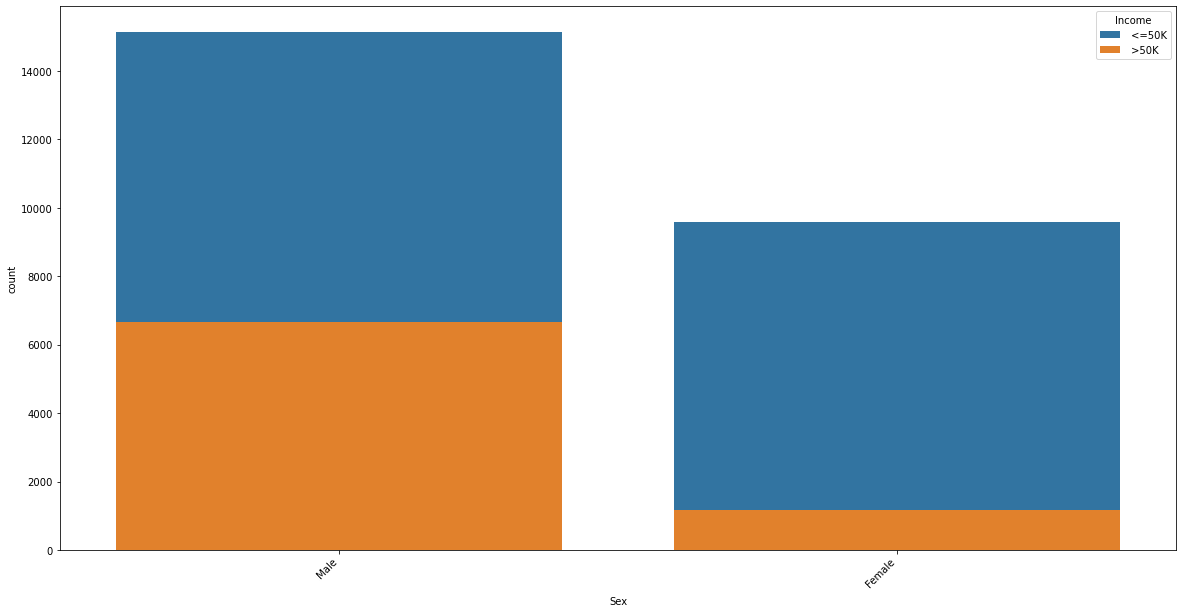

In [42]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Sex', hue = 'Income', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Income', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

Here:
- __Income of Male is high.__

### <span style="color:blue">-> Checking the distribution of Capital_gain and  Occupation as per gender</span>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

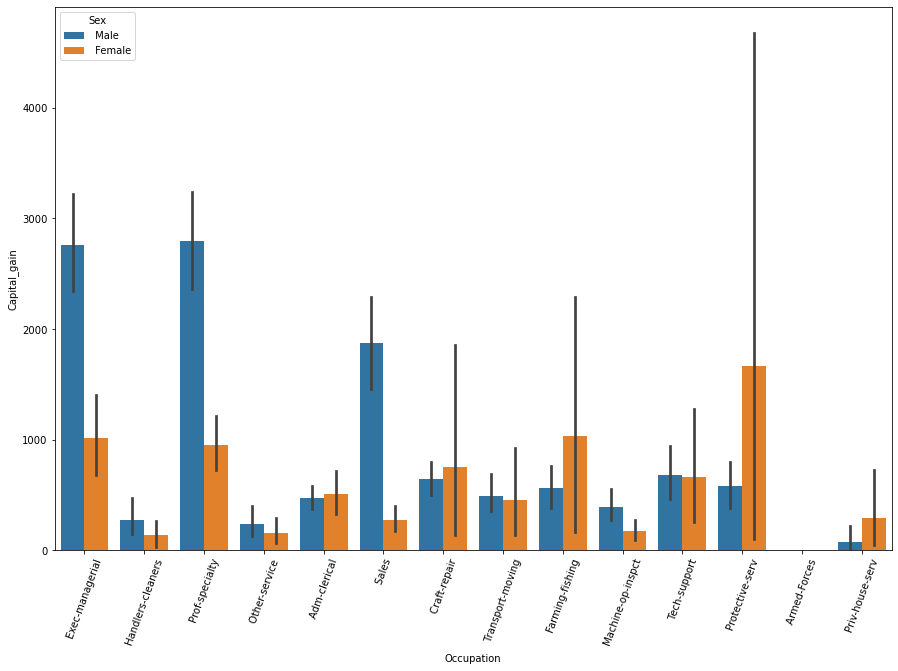

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=70)


#### <span style="color:blue">Observation:-</span>

Here:

- __Income of Exec-mangerial of boy & Protective-serv of female is high.__

### <span style="color:blue">-> Checking the distribution of Education and  Hours_per_week as gender</span>

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

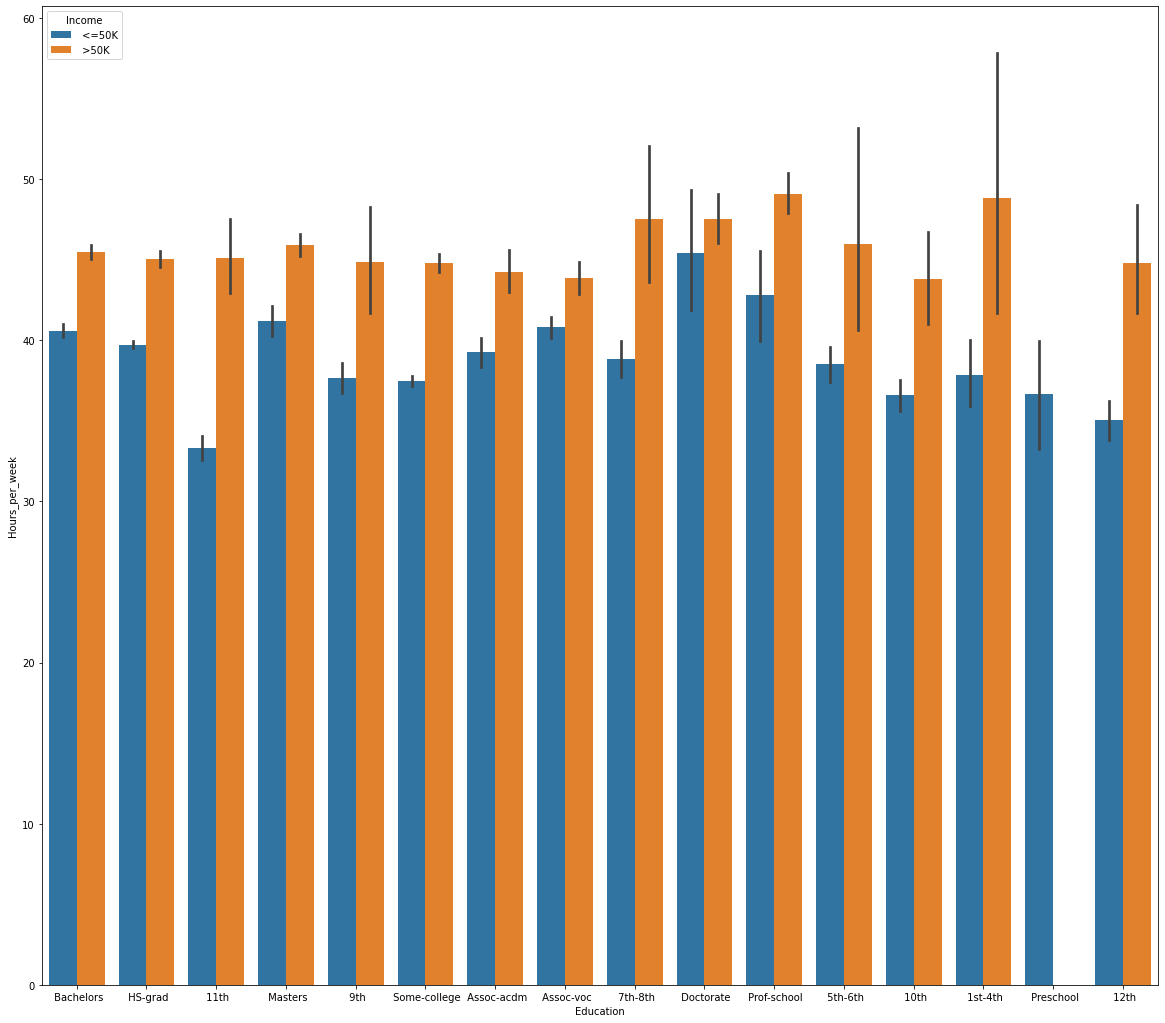

In [44]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Income')


### <span style="color:blue">-> Checking the distribution of Capital_loss and  Occupation as per gender</span>

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

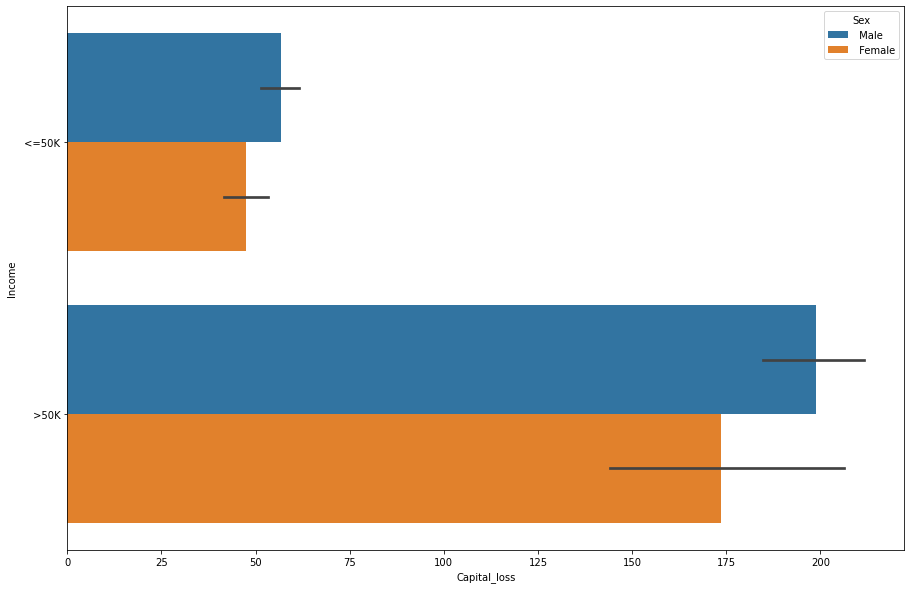

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x='Capital_loss',y='Income',data=df,hue='Sex')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

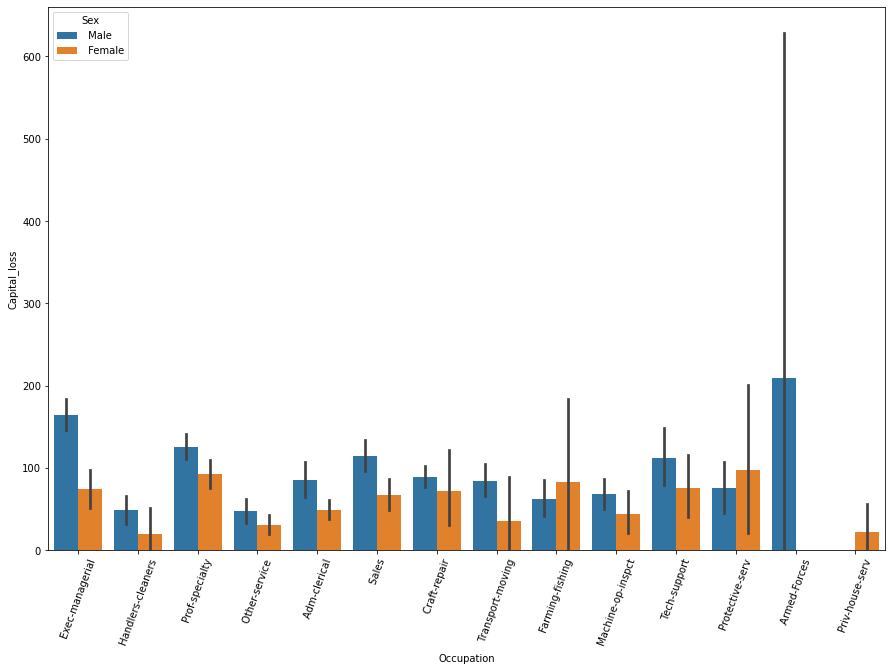

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_loss',data=df,hue='Sex')
plt.xticks(rotation=70)

#### <span style="color:blue">Observation:-</span>

Here

- __Capital_loss of Mails in Armed-Forces is high & Femail in Prof-specialty is high.__

Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income

### <span style="color:blue">-> Checking the distribution of Education and  Hours_per_week as gender</span>

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

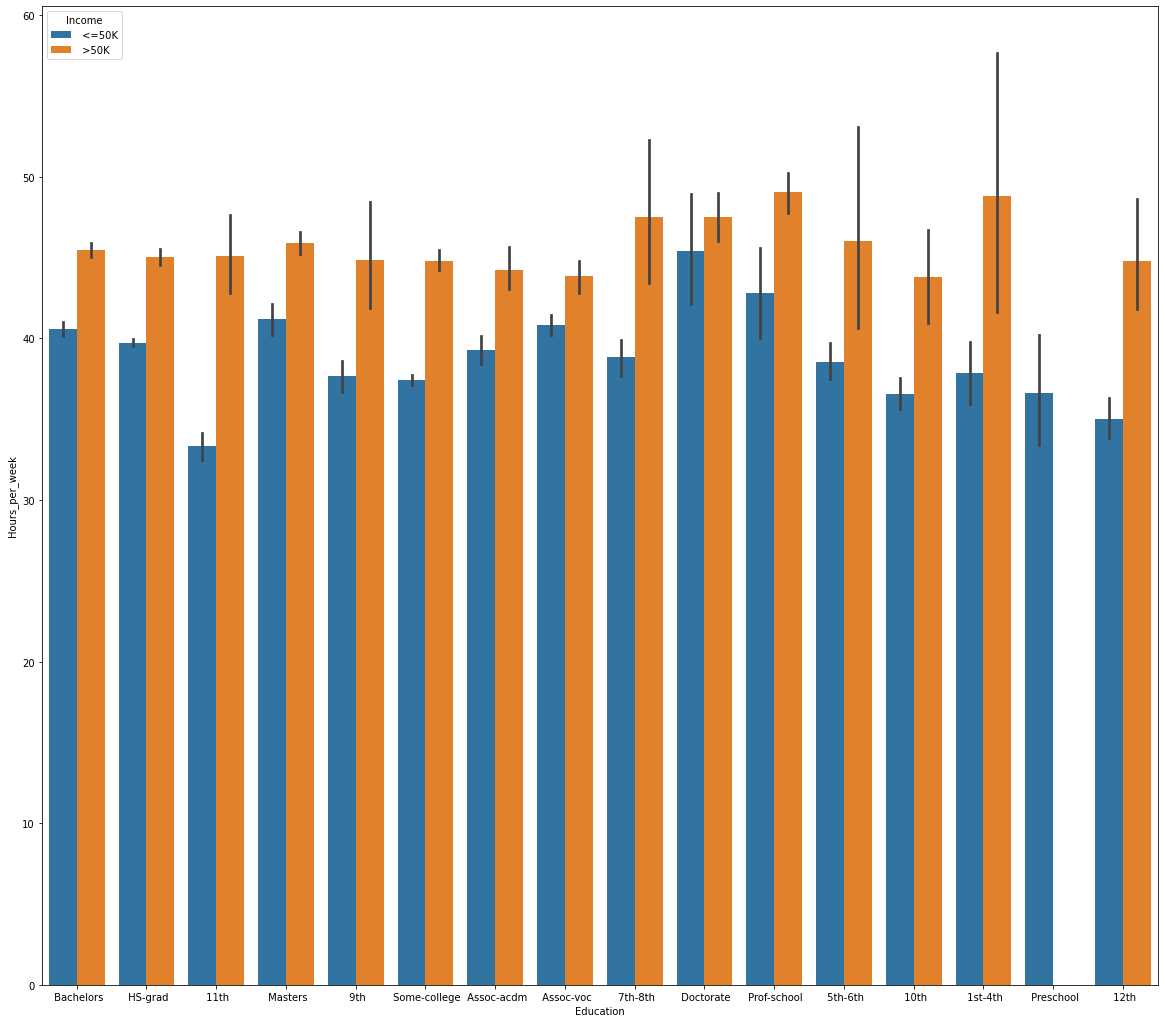

In [47]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Income')


## <span style="color:red">Level Encoding</span>

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder() # label encoder 
df['Income']=le.fit_transform(df['Income']) 
df['Sex']=le.fit_transform(df['Sex'])


In [50]:
#Converting 2 columns into binary 
df = pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

In [51]:
df.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## <span style="color:green">Correlation</span>

In [52]:
df.corr()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
Age,1.000000,-0.076646,0.036527,0.088832,0.077674,5.777479e-02,0.068756,0.234039,0.060901,-0.019362,-0.188709,0.102693,0.136253,0.012763,0.013995,-0.088314,-0.056016,0.039921,0.032076,0.102887,0.023014,-0.016196,-0.000434,0.010514,0.075787,0.019871,0.094761,0.012146,0.060652,-0.111262,-0.011896,0.315684,0.016698,-0.534377,0.010210,0.265177,-0.010190,0.012515,0.099353,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.071254,0.003891,-0.031980,-0.019576,0.026910,-0.010108,-0.070002,-0.432919,0.043188,0.020854,-0.011111,-0.019434,-0.034415,0.033412,0.017748,0.013920,0.003530,0.028501,-0.002903,-0.004170,-0.018643,0.009935,0.000840,0.003211,0.016691,-0.020041,-0.000833,-0.002674,-0.006938,-0.008963,0.015828,-0.002001,0.002231,-0.004228,0.027256,-0.010943,-0.001088,-0.006654,-0.055054,-0.011766,0.000202,-0.007522,0.004948,0.014285,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.017992,-0.015054,0.000375
Fnlwgt,-0.076646,1.000000,-0.043159,0.026882,0.000437,-1.025897e-02,-0.018770,-0.009481,-0.002836,0.005030,0.044128,-0.024632,-0.039068,-0.010735,-0.003049,0.009434,0.010246,0.033789,0.041091,-0.002295,0.015243,0.006352,-0.015650,-0.007167,-0.003311,-0.001589,-0.022237,0.017302,-0.005236,-0.005287,-0.000407,-0.026394,0.003630,0.037156,0.028461,-0.026252,0.004040,0.008452,-0.019211,-0.032938,0.029009,0.012753,-0.003730,0.007275,-0.015507,0.016563,0.003717,0.003759,0.001258,0.007559,0.025512,0.013805,0.004389,-0.016904,-0.051330,0.118001,0.006373,-0.056884,-0.005745,-0.004886,0.014277,0.028962,0.001015,-0.001090,0.034985,-0.003694,0.000642,-0.000281,-0.013102,0.031695,0.006705,-0.008501,0.012461,0.007650,-0.001760,-0.011171,-0.002608,-0.013325,-0.003636,0.010586,-0.001688,0.004752,0.134399,0.032100,0.0

<AxesSubplot:>

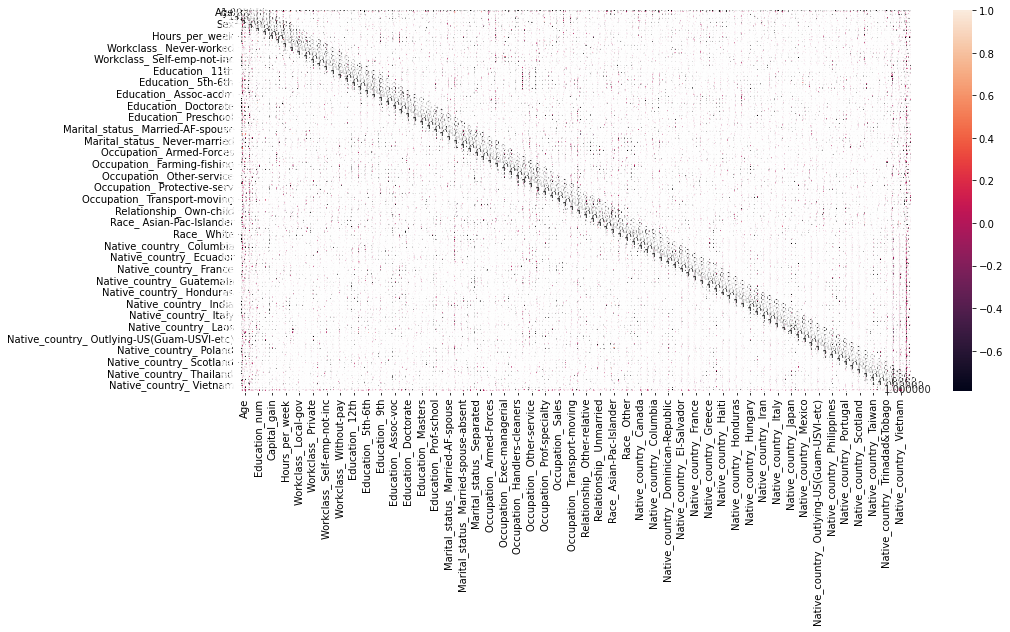

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt='2f')

## <span style="color:green">Using StandardScaler </span>

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
train_col_sacle = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df['Age']= train_scaler_col['Age']
df['Fnlwgt']= train_scaler_col['Fnlwgt']
df['Education_num']= train_scaler_col['Education_num']
df['Hours_per_week']= train_scaler_col['Hours_per_week']

## <span style="color:green">Spliting the data for training & testing </span>

In [57]:
# independent column

X = df.drop(['Income'],axis=1)

# target
y = df['Income'] #predictor variable

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.30, random_state= 11)



In [59]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (22792, 97)
Y Train Shape  (22792,)
X Test Shape  (9768, 97)
Y Test Shape  (9768,)


#  <span style="color:red">Model Building</span>

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

In [61]:
#Logistic Regression
lr=LogisticRegression() 

#KNearest Neibour
knn=KNeighborsClassifier()

# Deciesion Tree
dt=DecisionTreeClassifier() 

# Random Forest
rf=RandomForestClassifier() 

# Adaboost Classifier 
adb=AdaBoostClassifier()   

# support vactor classifier
svm=SVC()   

#Gradient Boosting Classifier 
gdboost=GradientBoostingClassifier() 

#Xtrim Gredient Boosting Classifier 
xgboost=XGBClassifier()  

print("Model is created")

Model is created


## <span style="color:green">Applying All 8 Models</span>

In [62]:
# Applying Logistic Regression
lr.fit(X_train, y_train)

# Applying KNearest Neibour
knn.fit(X_train,y_train)

# Applying Deciesion Tree
dt.fit(X_train,y_train)

# Applying Random Forest
rf.fit(X_train,y_train)

# Applying Adaboost Classifier
adb.fit(X_train,y_train)

# Applying support vactor classifier
svm.fit(X_train,y_train)

# Applying Gradient Boosting Classifier
gdboost.fit(X_train,y_train)

# Applying Xtrim Gredient Boosting Classifier
xgboost.fit(X_train,y_train)
print("Model is trained")

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model is trained


## <span style="color:green">Checking the accuracy of all 8 models</span>

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [64]:
# For Logistic Regression
print("Lr classification score",lr.score(X_train,y_train))

# For KNearest Neibour
print("knn classification score",knn.score(X_train,y_train))

# For Deciesion Tree
print("dt classification score",dt.score(X_train,y_train))

# For Random Forest
print("rf classification score",rf.score(X_train,y_train))

# For Adaboost Classifier
print("adb classification score",adb.score(X_train,y_train))

# For support vactor classifier
print("svm classification score",svm.score(X_train,y_train))

# For Gradient Boosting Classifier
print("gdboost classification score",gdboost.score(X_train,y_train))

# For Xtrim Gredient Boosting Classifier
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8442874692874693
knn classification score 0.8975956475956476
dt classification score 1.0
rf classification score 0.999956124956125
adb classification score 0.8588101088101088
svm classification score 0.8015531765531766
gdboost classification score 0.8684187434187434
xgboost classification score 0.9080379080379081


## <span style="color:green">Using Confusion Matrix For Model Evaluation</span>

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [66]:
lr_yprad = lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("Confusion Matrix for lr_model",'\n',lr_conf_mat)

Confusion Matrix for lr_model 
 [[6893  519]
 [ 940 1416]]


In [67]:
knn_yprad = knn.predict(X_test)
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("Confusion Matrix for knn_model",'\n',knn_conf_mat)

Confusion Matrix for knn_model 
 [[6766  646]
 [ 726 1630]]


In [68]:
dt_yprad = dt.predict(X_test)
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("Confusion Matrix for dt_model",'\n',dt_conf_mat)

Confusion Matrix for dt_model 
 [[6474  938]
 [ 857 1499]]


In [69]:
rf_yprad = rf.predict(X_test)
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("Confusion Matrix for lr_model",'\n',rf_conf_mat)

Confusion Matrix for lr_model 
 [[6854  558]
 [ 869 1487]]


In [70]:
adb_yprad = adb.predict(X_test)
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("Confusion Matrix for lr_model",'\n',adb_conf_mat)

Confusion Matrix for lr_model 
 [[6961  451]
 [ 898 1458]]


In [71]:
svm_yprad = svm.predict(X_test)
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("Confusion Matrix for svm_model",'\n',svm_conf_mat)

Confusion Matrix for svm_model 
 [[7182  230]
 [1683  673]]


In [72]:
gdboost_yprad = gdboost.predict(X_test)
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("Confusion Matrix for gdboost_model",'\n',gdboost_conf_mat)

Confusion Matrix for gdboost_model 
 [[7039  373]
 [ 904 1452]]


In [73]:
xgboost_yprad = xgboost.predict(X_test)
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("Confusion Matrix for xgboost_model",'\n',xgboost_conf_mat)

Confusion Matrix for xgboost_model 
 [[6934  478]
 [ 766 1590]]


## <span style="color:green">Checking Classification Report Of All Model</span>

In [74]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7412
           1       0.73      0.60      0.66      2356

    accuracy                           0.85      9768
   macro avg       0.81      0.77      0.78      9768
weighted avg       0.84      0.85      0.85      9768

 knn classification_report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7412
           1       0.72      0.69      0.70      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.80      0.81      9768
weighted avg       0.86      0.86      0.86      9768

 dt classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7412
           1       0.62      0.64      0.63      2356

    accuracy                           0.82      9768
   macro avg       0.75      0.75      0.75

#### <span style="color:blue">Observation:-</span>

- We see that the Gradient Boosting Classifier gives us an accuracy of ~87% (higher than SVC), and the f1-score, recall and precision scores also improve. Hence we choose ‘Gradient boosting classifier’ as our final model, and proceed with hypertuning the model. But before this, we perform k-folds cross validation on our dataset.

## <span style="color:blue">-> Using AUC - ROC Curve</span>

In [75]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [76]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7654985445526321
0.8023473154623759
0.754848169856251
0.7779355874060968
0.778999113079602
0.6273114446632222
0.7829875061502616
0.8051913246724213


### <span style="color:green">-> Using ROC curve to check best fittted model</span>

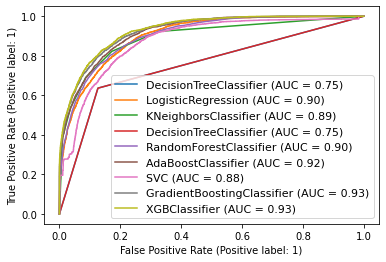

In [77]:

disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

#### <span style="color:blue">Observation:-</span>

- As we can see our XGB classifier and Gradient Boosting classifier giving the best scores.

## <span style="color:blue">-> K-Fold Cross Validation</span>

- __The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).__

- __K-Fold Cross Validation randomly splits the training data into K subsets called folds. When we write K=3, it means we are spliting our data into 3 parts in order to train and evaluate.__

In [78]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [79]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())


Mean of Cross validation score for gdboost  model => 0.8656633906633907
Cross validation score for xgboost model => 0.8696867321867321


#### <span style="color:blue">Observation:-</span>


- As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase.

### <span style="color:red"> xgboost model  </span>

# <span style="color:red">MODEL SAVING:---------</span>

In [80]:
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(xgboost,open(Census_model,'wb'))

# <span style="color:red">--------------------------------------------> Conclusion <----------------------------------------------- </span>

__To conclude, There are many other ways also to improve the model accuracy like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features, Along with resampling the data in case of imbalance or more extensive hyperparameter tuning on several machine learning models.__

In [81]:
Model = pickle.load(open('Census_model.pickle','rb'))
result = Model.score(X_test, y_test)
print(result)

0.8726453726453727


In [82]:
Prediction=np.array(xgboost.predict(X_test))

In [83]:
Conclusion  =pd.DataFrame([Model.predict(X_test)[:],Prediction[:]],index=['Predicted','Original'])

In [84]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9718,9719,9720,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741,9742,9743,9744,9745,9746,9747,9748,9749,9750,9751,9752,9753,9754,9755,9756,9757,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
Original,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
